In [1]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os

os.chdir("/Users/cesare.chung/Dropbox/2017ML/ML_Titanic")


In [3]:
df = pd.read_csv('train2.csv',  header=0)    

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'][0:10]
df.Age[0:10]
type(df['Age'])

df['Age'].mean()


29.69911764705882

In [5]:
df[['Sex', 'Pclass', 'Age']]
df[df['Age'] > 60]
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']].head()


,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0


In [6]:
 df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()


,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [7]:
for i in range(1,4):
    print (i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]))


1 122
2 108
3 347


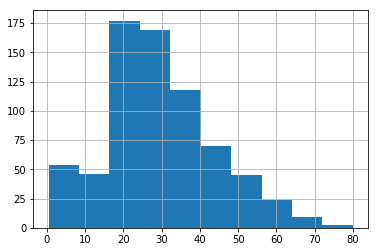

In [8]:
import pylab as P
df['Age'].hist()
P.show()


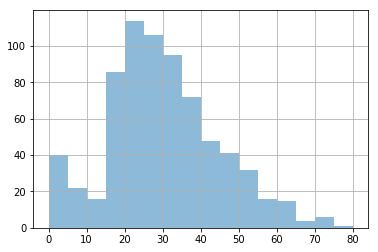

In [9]:
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()


In [10]:
df['Gender'] = 4

df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [11]:
median_ages = np.zeros((2,3))
median_ages


array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [12]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()

In [13]:
median_ages

df['AgeFill'] = df['Age']

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [14]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)


,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [15]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]


In [16]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

df['AgeIsNull'] = pd.isnull(df.Age).astype(int)

df['FamilySize'] = df['SibSp'] + df['Parch']

df['Age*Class'] = df.AgeFill * df.Pclass


In [17]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int64
AgeFill        float64
AgeIsNull        int64
FamilySize       int64
Age*Class      float64
dtype: object

In [18]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [19]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 


In [20]:
df = df.drop(['Age'], axis=1)
df = df.dropna()


In [21]:
train_data = df.values
train_data


array([[   1. ,    0. ,    3. , ...,    0. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    0. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])